In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph
import importlib
import methods
import uuid

In [130]:
def build_community_graph(n_coms, n_com_nodes=10, intra_com_p=0.6, inter_com_p=0.05):
    coms = [[str(uuid.uuid4()) for _ in range(n_com_nodes)] for _ in range(n_coms)]
    edges = []
    offset = 0
    offsets = [0 for _ in range(len(coms))]
    for k, c in enumerate(coms):
        offsets[k] = offset
        for i, n1 in enumerate(c):
            for j, n2 in enumerate(c):
                if i != j and np.random.uniform() <= intra_com_p:
                    edges.append((offset + i, offset + j))
        offset += len(c)
    
    for i, c1 in enumerate(coms):
        for j, c2 in enumerate(coms):
            if i != j:
                for k, n1 in enumerate(c1):
                    for l, n2 in enumerate(c2):
                        if np.random.uniform() <= inter_com_p:
                            edges.append((offsets[i] + k, offsets[j] + l))
    
    result = igraph.Graph(edges=edges, directed=False)
    result.vs['name'] = sum(coms, [])
    return result

graph = build_community_graph(2, intra_com_p=0.5, inter_com_p=0.05)

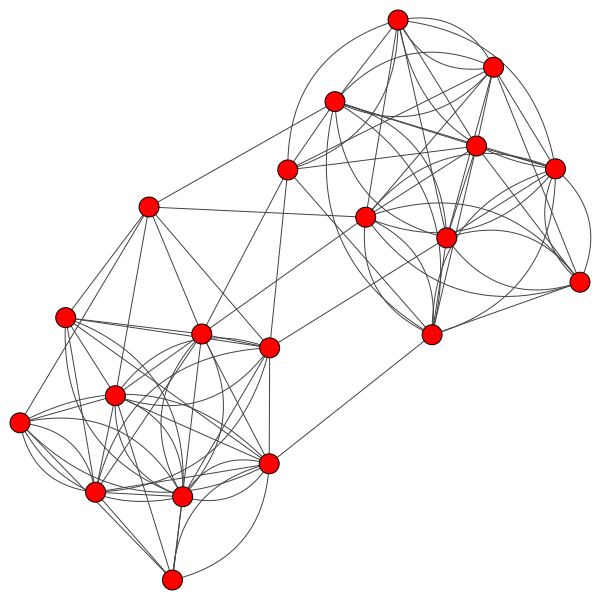

In [131]:
igraph.plot(graph)

In [195]:
laplacian = np.zeros(shape=(len(graph.vs), len(graph.vs)))
for v in graph.vs:
    for n in v.neighbors():
        laplacian[v.index][n.index] = -1
    laplacian[v.index][v.index] = v.degree()

In [203]:
laplacian[:10,:10]

array([[  8.,   0.,  -1.,  -1.,   0.,  -1.,   0.,   0.,  -1.,  -1.],
       [  0.,  12.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,   9.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  10.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.],
       [  0.,  -1.,  -1.,  -1.,  11.,   0.,   0.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,   0.,  11.,  -1.,   0.,  -1.,  -1.],
       [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  10.,  -1.,  -1.,  -1.],
       [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   9.,   0.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  10.,   0.],
       [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,   0.,  11.]])

In [197]:
vals, vecs = np.linalg.eigh(laplacian)

In [198]:
vals

array([  1.98712077,   3.21565806,   6.33175761,   7.42601831,
         7.80054587,   9.1415015 ,   9.32099412,   9.85073763,
        10.08526119,  10.36402434,  10.78779366,  11.20065037,
        11.44800803,  11.8756524 ,  12.375052  ,  12.60141867,
        12.82222861,  13.301709  ,  13.92495752,  14.13891034])

In [199]:
vecs

array([[ -2.44654614e-01,   2.24046885e-01,   2.01135421e-02,
         -6.20868127e-01,   4.63321268e-01,   2.64355861e-03,
         -3.42845989e-01,  -2.96669775e-02,  -2.20856305e-02,
         -2.40298664e-01,   7.95993419e-03,  -9.53412063e-02,
          1.07987676e-01,   5.75148982e-02,  -2.58706235e-02,
          1.73645829e-01,  -5.95269431e-02,  -6.26402371e-02,
          4.45979644e-02,   2.19854523e-01],
       [ -1.48864720e-01,   2.27164302e-01,   4.55358417e-02,
          1.26430219e-01,  -1.07268065e-01,   5.18474537e-03,
          9.92955757e-02,  -2.87883551e-03,  -8.35659901e-03,
          5.68232196e-02,   2.08904250e-01,   9.50914046e-02,
         -9.58578501e-04,  -7.67563031e-02,   3.42056295e-02,
          1.31555191e-03,  -6.12639660e-01,  -6.61534225e-01,
          5.22631049e-02,   8.96869601e-02],
       [ -2.35131935e-01,   3.60639265e-01,   8.82595908e-02,
          3.25766093e-02,  -4.29261573e-02,   2.63819806e-02,
          3.30822145e-02,  -2.59497331e-01

In [204]:
sorted(vals)

[1.9871207727706877,
 3.2156580573739162,
 6.3317576148156025,
 7.4260183100349382,
 7.8005458742775851,
 9.1415014974996911,
 9.3209941169955162,
 9.8507376330140701,
 10.085261188456343,
 10.364024344066452,
 10.78779365710824,
 11.200650372175534,
 11.448008030355712,
 11.875652395718905,
 12.375051998705207,
 12.601418666665614,
 12.822228607271716,
 13.30170900245747,
 13.924957516971332,
 14.138910343265476]

In [216]:
for vec in vecs:
    temp = vec < 0
    if np.all(temp[:10]) and not np.any(temp[11:]):
        print(temp)
#     print(np.sum(np.absolute(vec < 0 != np.array([True]*10 + [False]*10))))

In [217]:
# membership = [v > np.median(vecs[1]) for v in vecs[list(vals).index(sorted(vals)[1])]]
membership = [v >= 0 for v in vecs[:, list(vals).index(sorted(vals)[1])]]
clust = igraph.VertexClustering(graph, membership=membership)
# clust = igraph.VertexClustering(graph, membership=[True]*10 + [False]*10)

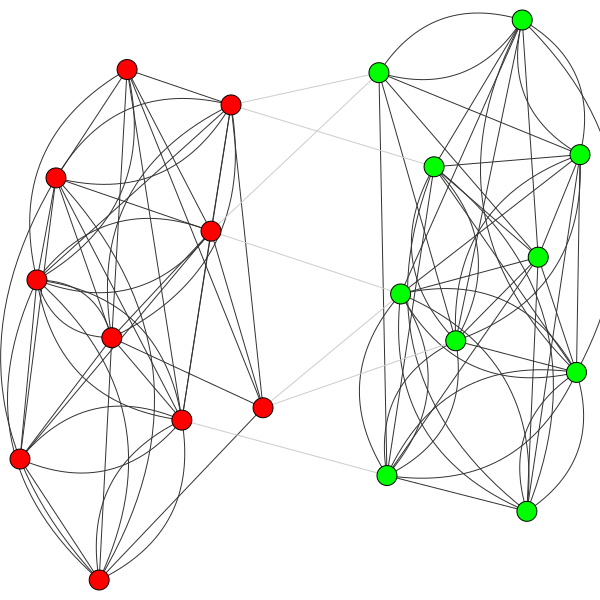

In [218]:
igraph.plot(clust)

In [137]:
clust_2 = graph.community_optimal_modularity()

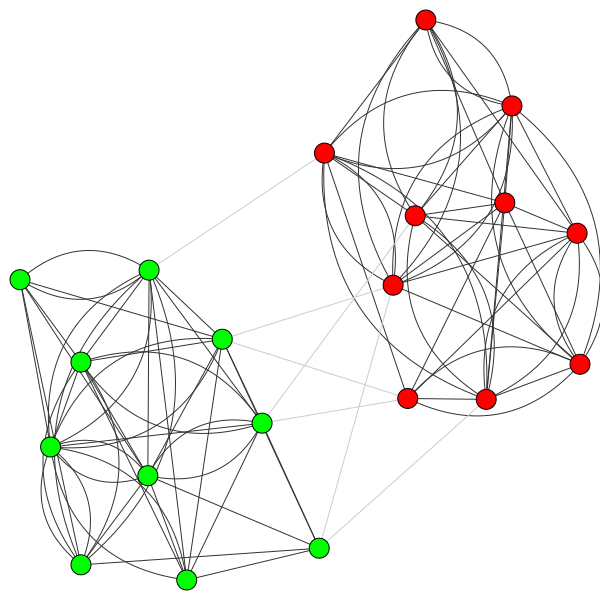

In [138]:
igraph.plot(clust_2)